1. Descripción del Problema (Investigación)

    Objetivo: Desarrollar un modelo que simule la propagación de una enfermedad infecciosa en una población determinada.
    Justificación: Entender cómo se propaga una enfermedad puede ayudar a tomar decisiones informadas sobre medidas de salud pública, como vacunación, cuarentenas, o restricciones de movilidad.

2. Técnica Utilizada (Aplicación)

    Modelo Epidemiológico: Usaremos el modelo SIR, que divide la población en tres categorías: Susceptible (S), Infectado (I), y Recuperado (R).
    Parámetros Clave: Tasa de transmisión, tasa de recuperación, y población inicial en cada categoría.

3. Implementación (Solución)

    Construcción del Modelo: Crearemos un modelo matemático basado en ecuaciones diferenciales que describan la transición entre los estados S, I, y R.
    Simulación: Realizaremos simulaciones variando los parámetros clave para observar diferentes escenarios de propagación.

4. Calibración y Validación

    Calibración: Ajustaremos los parámetros del modelo utilizando datos reales de un brote de enfermedad específico.
    Validación: Compararemos las predicciones del modelo con los datos reales para evaluar su precisión.

5. Análisis de Sensibilidad

    Objetivo: Determinar cómo la variación en los parámetros afecta los resultados del modelo.
    Método: Variaremos sistemáticamente los parámetros (como la tasa de transmisión) y observaremos los cambios en la dinámica de la epidemia.

6. Recomendaciones (Reflexión)

    Aplicaciones del Modelo: Ofreceremos recomendaciones sobre cómo utilizar el modelo para apoyar la toma de decisiones en salud pública.
    Limitaciones y Mejoras Futuras: Discutiremos las limitaciones del modelo y posibles extensiones o mejoras.

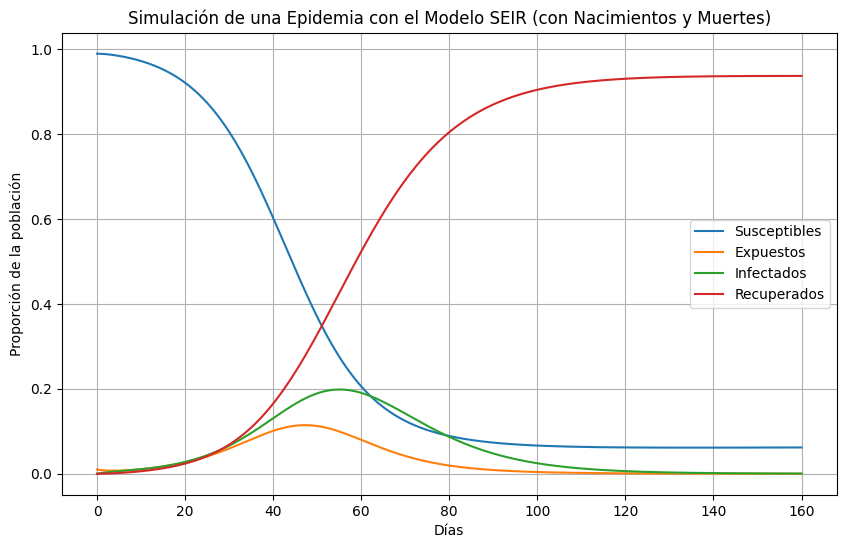

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# Implementación del modelo SEIR

def modelo_seir_con_nacimientos_muertes(y, t, N, beta, sigma, gamma, mu):
    S, E, I, R = y
    dS_dt = mu * N - beta * S * I / N - mu * S
    dE_dt = beta * S * I / N - sigma * E - mu * E
    dI_dt = sigma * E - gamma * I - mu * I
    dR_dt = gamma * I - mu * R
    return [dS_dt, dE_dt, dI_dt, dR_dt]

# Parámetros del modelo
N = 1      # Población total (normalizada a 1)
beta = 0.3 # tasa de transmisión
sigma = 1/5.0 # tasa de incubación (por ejemplo, 5 días de incubación)
gamma = 0.1 # tasa de recuperación
t = np.linspace(0, 160, 160) # Tiempo de simulación (en días)
mu = 1/(70*365.0)  # Asumiendo una esperanza de vida promedio de 70 años

# Condiciones iniciales
S0 = 0.99  # Porcentaje de la población susceptible al inicio
E0 = 0.01  # Porcentaje de la población expuesta al inicio
I0 = 0.0   # Porcentaje de la población infectada al inicio
R0 = 0.0   # Porcentaje de la población recuperada al inicio
condiciones_iniciales_seir = [S0, E0, I0, R0]

# Resolución del sistema de ecuaciones para el modelo SEIR con nacimientos y muertes
solucion_seir_nm = odeint(modelo_seir_con_nacimientos_muertes, condiciones_iniciales_seir, t, args=(N, beta, sigma, gamma, mu))

# Extracción de resultados para el modelo SEIR con nacimientos y muertes
S_seir_nm, E_seir_nm, I_seir_nm, R_seir_nm = solucion_seir_nm.T

# Visualización de resultados para el modelo SEIR con nacimientos y muertes
plt.figure(figsize=(10,6))
plt.plot(t, S_seir_nm, label='Susceptibles')
plt.plot(t, E_seir_nm, label='Expuestos')
plt.plot(t, I_seir_nm, label='Infectados')
plt.plot(t, R_seir_nm, label='Recuperados')
plt.xlabel('Días')
plt.ylabel('Proporción de la población')
plt.title('Simulación de una Epidemia con el Modelo SEIR (con Nacimientos y Muertes)')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# Implementación del modelo SEIR

def modelo_seir_con_nacimientos_muertes(y, t, N, beta, sigma, gamma, mu):
    S, E, I, R = y

    beta_actual = beta

    # Ecuaciones del modelo SEIR
    dS_dt = mu * N - beta_actual * S * I / N - mu * S
    dE_dt = beta_actual * S * I / N - sigma * E - mu * E
    dI_dt = sigma * E - gamma * I - mu * I
    dR_dt = gamma * I - mu * R
    return [dS_dt, dE_dt, dI_dt, dR_dt]

# Parámetros ajustados para COVID-19
N = 1      # Población total (normalizada a 1)
beta_covid = 2.5 / 10  # Estimación: R0 de 2.5 y un periodo infeccioso de 10 días
sigma_covid = 1/5.0    # Periodo de incubación de 5 días
gamma_covid = 1/10.0   # Duración promedio de la infección de 10 días
t = np.linspace(0, 160, 160) # Tiempo de simulación (en días)
mu_covid = 1/(70*365.0)  # Tasa de nacimiento/muerte

# Condiciones iniciales
S0 = 0.99  # Porcentaje de la población susceptible al inicio
E0 = 0.01  # Porcentaje de la población expuesta al inicio
I0 = 0.0   # Porcentaje de la población infectada al inicio
R0 = 0.0   # Porcentaje de la población recuperada al inicio
condiciones_iniciales_seir = [S0, E0, I0, R0]

# Resolución del sistema de ecuaciones para el modelo SEIR con parámetros de COVID-19
solucion_covid = odeint(modelo_seir_con_nacimientos_muertes, condiciones_iniciales_seir, t, args=(N, beta_covid, sigma_covid, gamma_covid, mu_covid))

# Extracción de resultados para el modelo SEIR con parámetros de COVID-19
S_covid, E_covid, I_covid, R_covid = solucion_covid.T

# Visualización de resultados para el modelo SEIR con parámetros de COVID-19
plt.figure(figsize=(10,6))
plt.plot(t, S_covid, label='Susceptibles')
plt.plot(t, E_covid, label='Expuestos')
plt.plot(t, I_covid, label='Infectados')
plt.plot(t, R_covid, label='Recuperados')
plt.xlabel('Días')
plt.ylabel('Proporción de la población')
plt.title('Simulación de una Epidemia de COVID-19 con el Modelo SEIR (con Nacimientos y Muertes)')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'modelo_seir_con_nacimientos_muertes' is not defined

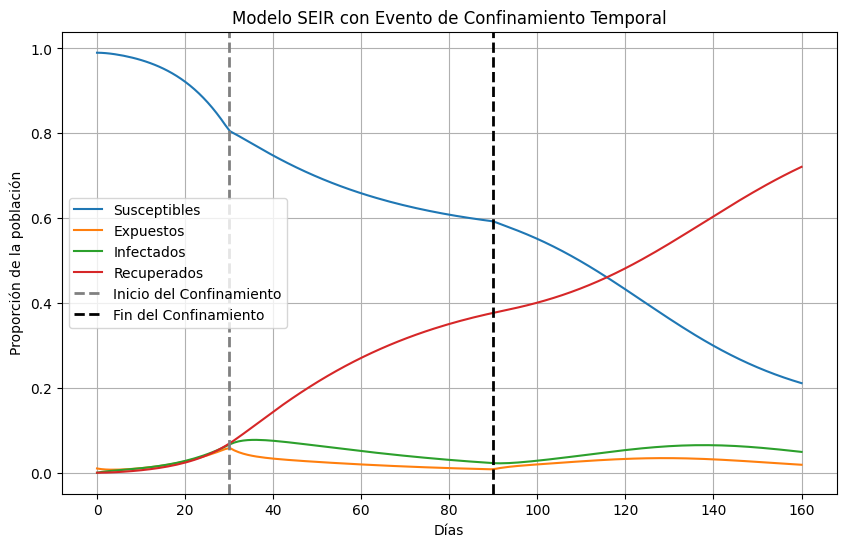

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

# Implementación del modelo SEIR con un evento de confinamiento temporal
def modelo_seir_confinamiento(y, t, N, beta, beta_reducido, sigma, gamma, mu, inicio_confinamiento, fin_confinamiento):
    S, E, I, R = y

    # Aplicar una reducción en la tasa de transmisión durante el período de confinamiento
    if inicio_confinamiento <= t <= fin_confinamiento:
        beta_actual = beta_reducido
    else:
        beta_actual = beta

    # Ecuaciones del modelo SEIR
    dS_dt = mu * N - beta_actual * S * I / N - mu * S
    dE_dt = beta_actual * S * I / N - sigma * E - mu * E
    dI_dt = sigma * E - gamma * I - mu * I
    dR_dt = gamma * I - mu * R
    return [dS_dt, dE_dt, dI_dt, dR_dt]

# Parámetros del modelo con confinamiento
beta = 0.3  # Tasa de transmisión normal
beta_reducido = 0.1  # Tasa de transmisión reducida durante el confinamiento
inicio_confinamiento = 30  # Día de inicio del confinamiento
fin_confinamiento = 90   # Día de fin del confinamiento

# Resolución del sistema de ecuaciones con confinamiento
solucion_seir_confinamiento = odeint(modelo_seir_confinamiento, condiciones_iniciales_seir, t, args=(N, beta, beta_reducido, sigma, gamma, mu, inicio_confinamiento, fin_confinamiento))

# Extracción de resultados con confinamiento
S_seir_confinamiento, E_seir_confinamiento, I_seir_confinamiento, R_seir_confinamiento = solucion_seir_confinamiento.T

# Visualización de resultados con confinamiento
plt.figure(figsize=(10,6))
plt.plot(t, S_seir_confinamiento, label='Susceptibles')
plt.plot(t, E_seir_confinamiento, label='Expuestos')
plt.plot(t, I_seir_confinamiento, label='Infectados')
plt.plot(t, R_seir_confinamiento, label='Recuperados')
plt.axvline(x=inicio_confinamiento, color='grey', linestyle='--', lw=2, label='Inicio del Confinamiento')
plt.axvline(x=fin_confinamiento, color='black', linestyle='--', lw=2, label='Fin del Confinamiento')
plt.xlabel('Días')
plt.ylabel('Proporción de la población')
plt.title('Modelo SEIR con Evento de Confinamiento Temporal')
plt.legend()
plt.grid(True)
plt.show()
